# MNIST classifier

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [167]:
from sklearn.datasets import load_digits

In [168]:
mnist = load_digits()

In [169]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Data

In [170]:
df_features = pd.DataFrame(mnist.data)

In [171]:
print(df_features.shape)
df_features.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Target

In [198]:
df_target = pd.DataFrame(mnist.target, columns = ['target'])

In [199]:
df_target.head()

,target
0,0
1,1
2,2
3,3
4,4


## Images

Image 8 x 8

target    9
Name: 655, dtype: int64


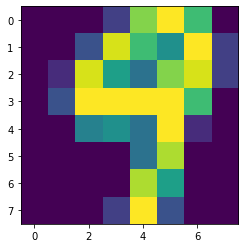

In [188]:
i = 655
print(df_target.iloc[i])
plt.imshow(mnist.images[i]);

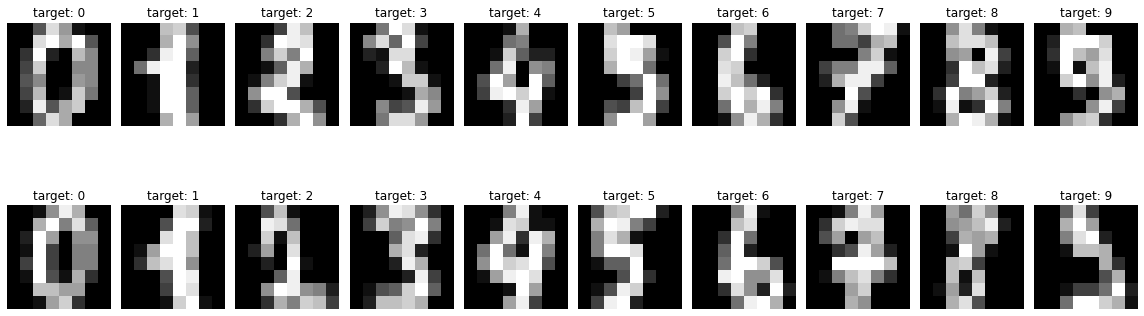

In [189]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

## Split in test and train dataset

In [190]:
from sklearn.model_selection import train_test_split

In [206]:
df_train_features, df_test_features, df_train_target, df_test_target = \
        train_test_split(df_features, df_target, test_size = 0.3)

In [208]:
print('df_train_features', df_train_features.shape)
print('df_train_target', df_train_target.shape)
print('df_test_features', df_test_features.shape)
print('df_test_target', df_test_target.shape)

df_train_features (1257, 64)
df_train_target (1257, 1)
df_test_features (540, 64)
df_test_target (540, 1)


In [209]:
df_test = pd.concat([df_test_features, df_test_target], axis = 1)
df_test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1143,0.0,0.0,7.0,16.0,13.0,2.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,6.0,16.0,16.0,16.0,16.0,13.0,2
1710,0.0,0.0,3.0,12.0,16.0,16.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,2.0,0.0,0.0,0.0,7
1032,0.0,0.0,6.0,12.0,13.0,9.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,5.0,14.0,12.0,13.0,2.0,0.0,3
1043,0.0,0.0,0.0,6.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,4
1319,0.0,2.0,16.0,16.0,16.0,16.0,3.0,0.0,0.0,1.0,...,0.0,0.0,3.0,16.0,16.0,16.0,5.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,13.0,8.0,13.0,16.0,8.0,2
338,0.0,0.0,0.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,15.0,16.0,8.0,0.0,6
1108,0.0,0.0,10.0,15.0,8.0,13.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,7
1280,0.0,0.0,13.0,16.0,16.0,15.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,13.0,16.0,15.0,3.0,0.0,0.0,8


In [211]:
X_train = df_train_features.values
y_train = df_train_target['target'].values
X_test = df_test_features.values
y_test = df_test_target['target'].values

In [275]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1257, 64)
y_train (1257,)
X_test (540, 64)
y_test (540,)


## Helper functions

In [276]:
def print_accuracy(target, predicted):
    n = len(target)
    n_correct = (target == predicted).sum()
    accuracy = sklm.accuracy_score(target, predicted)
    print(f"{n_correct} goed van de {n}. {n - n_correct} fout. Accuracy {accuracy:.2f}.")

In [397]:
def show_images(df, predicted_column = None):
    n_images = len(df)
    
    n_cols = 10
    n_rows = n_images // n_cols + 1
    n_cols_on_last_row  = n_images % n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
    for i_col in range(n_cols_on_last_row, n_cols):
        ax = axes[n_rows - 1, i_col]
        fig.delaxes(ax)
    
    for i, (index, row) in enumerate(df.iterrows()):        
        i_col = i % n_cols
        i_row = i // n_cols
        axes[i_row, i_col].imshow(mnist.images[index], cmap='gray');
        axes[i_row, i_col].axis('off')
        title = f"index: {index}\ntarget: {row['target']}"
        if predicted_column:
            title += f"\npredicted: {row[predicted_column]}"
        axes[i_row, i_col].set_title(title)

    fig.set_size_inches((14, 2.5 * n_rows))
    plt.tight_layout()    
    plt.show()

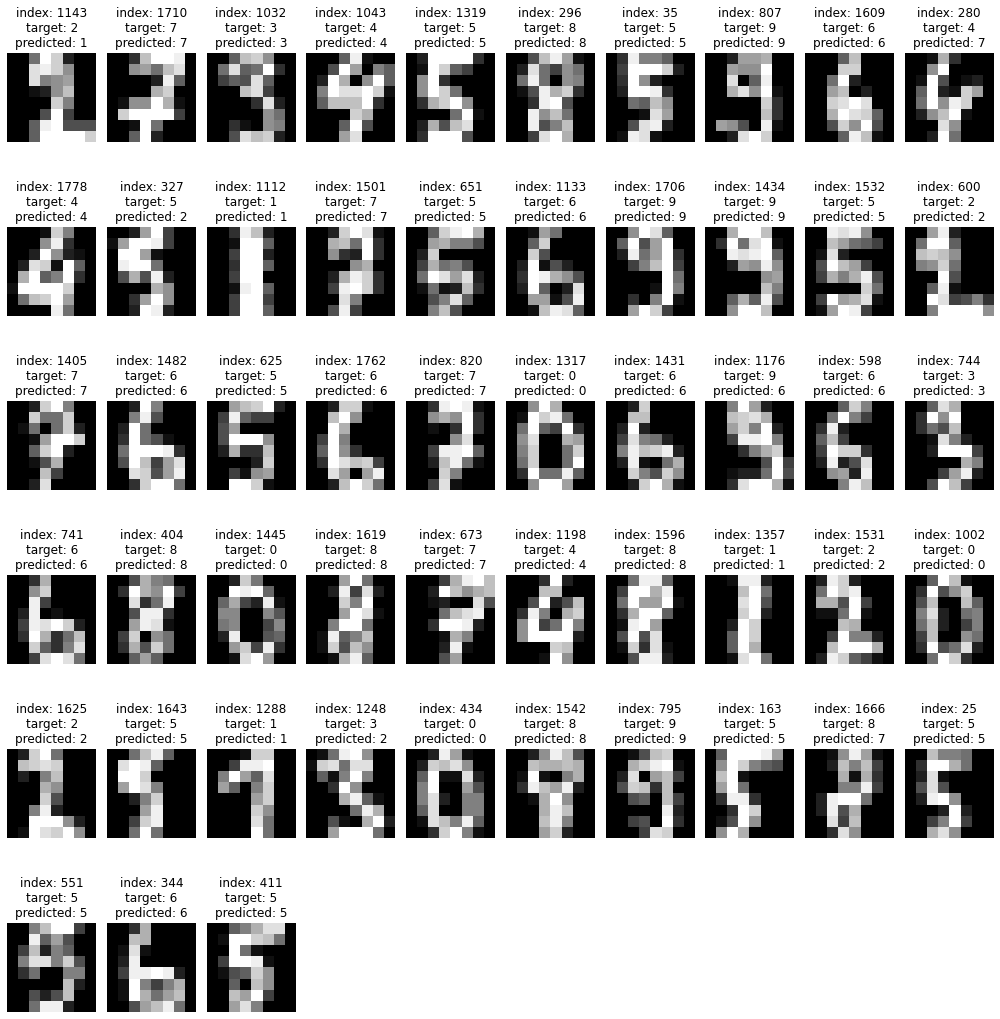

In [398]:
show_images(df_test.head(53), 'NB_predicted')

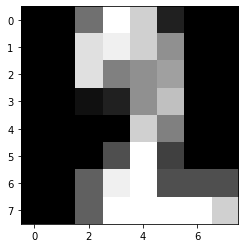

In [399]:
index = df_test.iloc[0].name
plt.imshow(mnist.images[index], cmap='gray')

## Naive Bayes Classification

In [214]:
from sklearn.naive_bayes import GaussianNB

In [215]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [216]:
y_predicted = nb_classifier.predict(X_test)

In [221]:
df_test['NB_predicted'] = y_predicted
df_test['NB_correct'] = df_test['NB_predicted'] == df_test['target']

In [222]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,target,NB_predicted,NB_correct
1143,0.0,0.0,7.0,16.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,6.0,16.0,16.0,16.0,16.0,13.0,2,1,False
1710,0.0,0.0,3.0,12.0,16.0,16.0,15.0,0.0,0.0,0.0,...,0.0,6.0,16.0,2.0,0.0,0.0,0.0,7,7,True
1032,0.0,0.0,6.0,12.0,13.0,9.0,0.0,0.0,0.0,7.0,...,0.0,5.0,14.0,12.0,13.0,2.0,0.0,3,3,True
1043,0.0,0.0,0.0,6.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,14.0,0.0,0.0,0.0,4,4,True
1319,0.0,2.0,16.0,16.0,16.0,16.0,3.0,0.0,0.0,1.0,...,3.0,16.0,16.0,16.0,5.0,0.0,0.0,5,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,...,0.0,13.0,13.0,8.0,13.0,16.0,8.0,2,2,True
338,0.0,0.0,0.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,15.0,16.0,8.0,0.0,6,6,True
1108,0.0,0.0,10.0,15.0,8.0,13.0,6.0,0.0,0.0,0.0,...,0.0,12.0,4.0,0.0,0.0,0.0,0.0,7,7,True
1280,0.0,0.0,13.0,16.0,16.0,15.0,2.0,0.0,0.0,0.0,...,1.0,13.0,16.0,15.0,3.0,0.0,0.0,8,8,True


In [279]:
print_accuracy(df_test['target'], df_test['NB_predicted'])

446 goed van de 540. 94 fout. Accuracy 0.83.


In [280]:
import sklearn.metrics as sklm

In [281]:
cm = sklm.confusion_matrix(df_test['target'], df_test['NB_predicted'])
cm

array([[59,  0,  0,  0,  1,  0,  0,  1,  1,  0],
       [ 0, 37,  1,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  6, 25,  2,  0,  1,  0,  0, 16,  0],
       [ 0,  0,  3, 37,  0,  0,  0,  0, 11,  0],
       [ 0,  3,  0,  0, 43,  1,  1,  8,  2,  0],
       [ 0,  0,  1,  1,  0, 50,  0,  2,  1,  1],
       [ 0,  1,  0,  0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  2,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  2, 48,  0],
       [ 0,  1,  1,  1,  0,  0,  1,  6,  4, 35]])

In [282]:
df_test[~df_test['NB_correct']]

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,target,NB_predicted,NB_correct,MLP_predicted,MLP_correct
1143,0.0,0.0,7.0,16.0,13.0,2.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,13.0,2,1,False,2,True
280,0.0,0.0,1.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,...,16.0,7.0,0.0,0.0,0.0,4,7,False,4,True
327,0.0,0.0,2.0,10.0,16.0,4.0,0.0,0.0,1.0,10.0,...,16.0,15.0,2.0,0.0,0.0,5,2,False,5,True
1176,0.0,0.0,8.0,16.0,10.0,2.0,0.0,0.0,0.0,0.0,...,14.0,16.0,16.0,11.0,1.0,9,6,False,9,True
1248,0.0,1.0,7.0,15.0,16.0,9.0,0.0,0.0,1.0,13.0,...,16.0,16.0,16.0,7.0,0.0,3,2,False,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0.0,2.0,11.0,16.0,15.0,2.0,0.0,0.0,0.0,12.0,...,15.0,12.0,5.0,0.0,0.0,2,8,False,2,True
1581,0.0,0.0,0.0,9.0,16.0,10.0,0.0,0.0,0.0,0.0,...,10.0,15.0,0.0,0.0,0.0,8,7,False,4,False
813,0.0,0.0,3.0,4.0,10.0,0.0,0.0,0.0,0.0,3.0,...,3.0,11.0,16.0,16.0,3.0,9,2,False,9,True
1652,0.0,0.0,4.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16.0,3.0,0.0,0.0,0.0,4,7,False,4,True


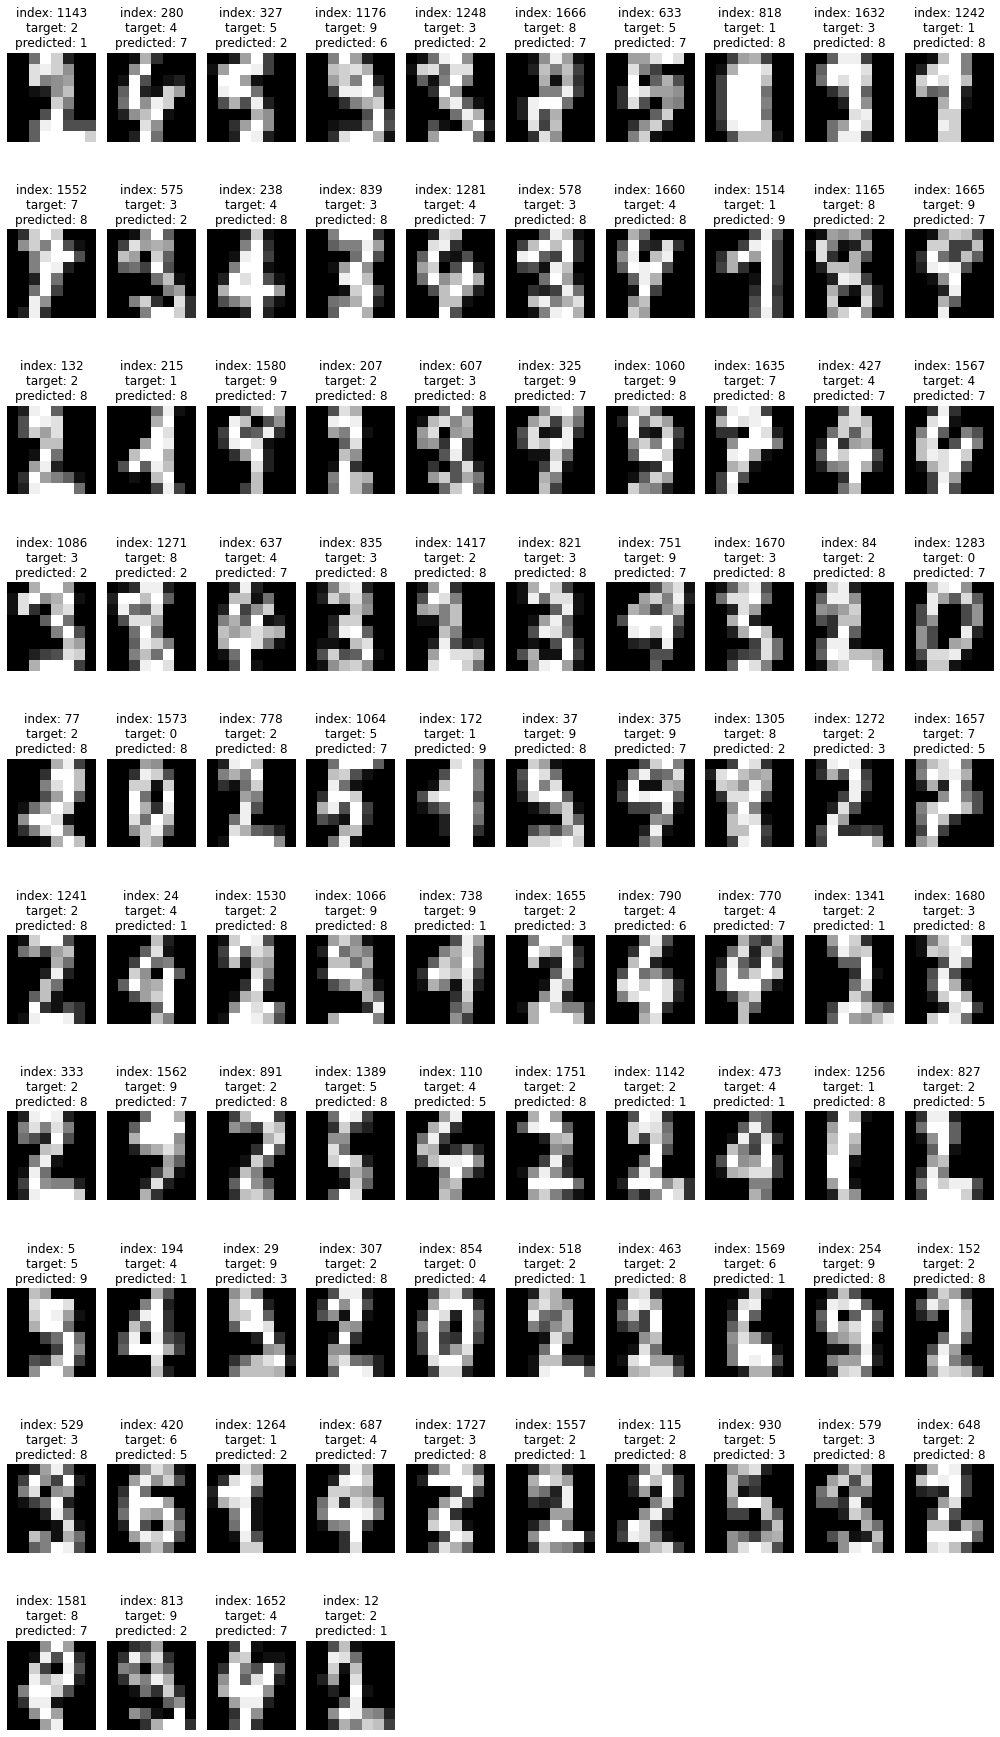

In [401]:
show_images(df_test.loc[~df_test['NB_correct'], :], 'NB_predicted')

## MLP

In [284]:
from sklearn.neural_network import MLPClassifier

In [285]:
mlp_classifier = MLPClassifier(solver='lbfgs',
                               activation='relu',     #'logistic',
                               alpha=1e-5,
                               hidden_layer_sizes=(64, 64), 
                               random_state=1,
                               max_iter=10000)

mlp_classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 64), max_iter=10000,
              random_state=1, solver='lbfgs')

In [286]:
y_predicted = mlp_classifier.predict(X_test)

In [287]:
df_test['MLP_predicted'] = y_predicted
df_test['MLP_correct'] = df_test['MLP_predicted'] == df_test['target']

In [288]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,target,NB_predicted,NB_correct,MLP_predicted,MLP_correct
1143,0.0,0.0,7.0,16.0,13.0,2.0,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,16.0,13.0,2,1,False,2,True
1710,0.0,0.0,3.0,12.0,16.0,16.0,15.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,7,7,True,7,True
1032,0.0,0.0,6.0,12.0,13.0,9.0,0.0,0.0,0.0,7.0,...,14.0,12.0,13.0,2.0,0.0,3,3,True,3,True
1043,0.0,0.0,0.0,6.0,15.0,1.0,0.0,0.0,0.0,0.0,...,10.0,14.0,0.0,0.0,0.0,4,4,True,4,True
1319,0.0,2.0,16.0,16.0,16.0,16.0,3.0,0.0,0.0,1.0,...,16.0,16.0,5.0,0.0,0.0,5,5,True,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,...,13.0,8.0,13.0,16.0,8.0,2,2,True,2,True
338,0.0,0.0,0.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,...,7.0,15.0,16.0,8.0,0.0,6,6,True,6,True
1108,0.0,0.0,10.0,15.0,8.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,7,7,True,7,True
1280,0.0,0.0,13.0,16.0,16.0,15.0,2.0,0.0,0.0,0.0,...,16.0,15.0,3.0,0.0,0.0,8,8,True,3,False


In [289]:
cm = sklm.confusion_matrix(df_test['target'], df_test['MLP_predicted'])
cm

array([[61,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  2, 47,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 54,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 54,  1,  1],
       [ 0,  1,  0,  1,  1,  1,  0,  1, 48,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  2, 45]])

In [290]:
print_accuracy(df_test['target'], df_test['MLP_predicted'])

514 goed van de 540. 26 fout. Accuracy 0.95.


In [498]:
df_test[~df_test['MLP_correct']]

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,target,NB_predicted,NB_correct,MLP_predicted,MLP_correct
1405,0.0,0.0,2.0,13.0,16.0,8.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,7,7,True,9,False
1288,0.0,0.0,0.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,...,0.0,16.0,7.0,0.0,0.0,1,1,True,9,False
1242,0.0,0.0,1.0,12.0,16.0,8.0,0.0,0.0,0.0,2.0,...,13.0,13.0,0.0,0.0,0.0,1,8,False,8,False
1552,0.0,3.0,13.0,16.0,13.0,0.0,0.0,0.0,0.0,9.0,...,3.0,0.0,0.0,0.0,0.0,7,8,False,8,False
1660,0.0,0.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,5.0,...,10.0,0.0,0.0,0.0,0.0,4,8,False,9,False
1197,0.0,0.0,13.0,14.0,12.0,15.0,4.0,0.0,0.0,0.0,...,16.0,8.0,0.0,0.0,0.0,8,8,True,5,False
491,0.0,0.0,6.0,12.0,11.0,0.0,0.0,0.0,0.0,2.0,...,12.0,13.0,13.0,5.0,0.0,9,9,True,8,False
1285,0.0,0.0,9.0,15.0,13.0,3.0,0.0,0.0,0.0,2.0,...,15.0,9.0,1.0,0.0,0.0,9,9,True,5,False
535,0.0,0.0,1.0,12.0,16.0,14.0,2.0,0.0,0.0,0.0,...,12.0,16.0,11.0,1.0,0.0,9,9,True,8,False
86,0.0,0.0,2.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,11.0,9.0,0.0,0.0,0.0,7,7,True,3,False


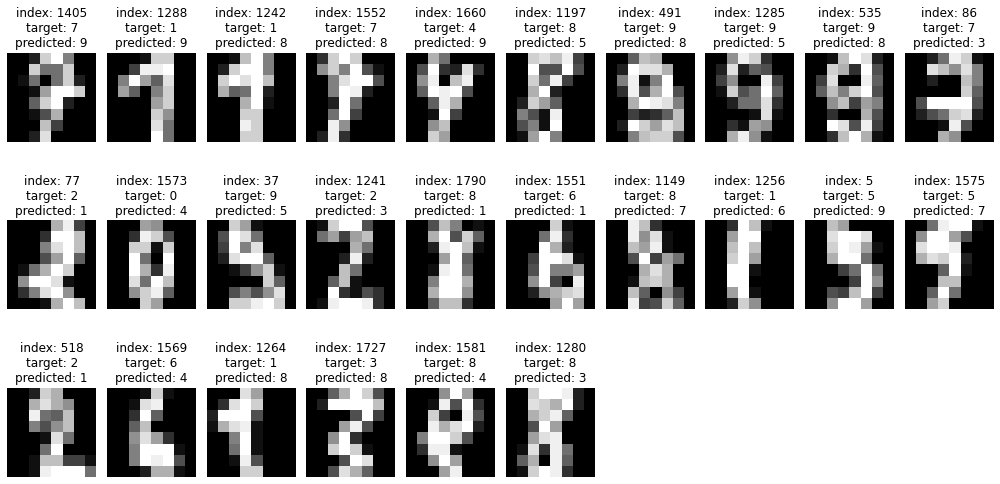

In [499]:
show_images(df_test[~df_test['MLP_correct']], 'MLP_predicted')

In [510]:
indeces = df_test[~df_test['MLP_correct']].index
indeces

Int64Index([1405, 1288, 1242, 1552, 1660, 1197,  491, 1285,  535,   86,   77,
            1573,   37, 1241, 1790, 1551, 1149, 1256,    5, 1575,  518, 1569,
            1264, 1727, 1581, 1280],
           dtype='int64')

In [511]:
y_probabilities = mlp_classifier.predict_proba(X_test)[~df_test['MLP_correct']]

In [514]:
y_probabilities.shape

(26, 10)

In [515]:
print(' index', end = '')
for digit in range(0, 10):
    print(f'{digit:6}', end = '')
    
print('\n------','------' * 10, sep = '')

for index, y_probability in zip(indeces, y_probabilities):
    print(f'{index:6}', end = '')
    for p in y_probability:
        print(f'{round(p*100, 2):6.1f}', end = '')
    print()

 index     0     1     2     3     4     5     6     7     8     9
------------------------------------------------------------------
  1405   0.0   0.0   0.0   0.0   0.0   0.0   0.0  19.2   1.6  79.1
  1288   0.0   2.6   0.0   0.0   0.0   0.0   0.0   0.0   0.0  97.3
  1242   0.0   2.5   0.0   0.0   0.0   0.0   0.0   0.0  97.4   0.2
  1552   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  77.8  22.2
  1660   0.0   0.0   0.0   0.0   1.1   0.0   0.0   0.0   6.1  92.8
  1197   0.0   0.0   0.0   0.0   0.0 100.0   0.0   0.0   0.0   0.0
   491   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  71.6  28.4
  1285   0.0   0.0   0.0   0.0   0.0  82.3   0.0   0.0   0.0  17.7
   535   3.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  94.2   2.7
    86   0.0   0.0   0.0  94.9   0.0   0.0   0.0   5.1   0.0   0.0
    77   0.0 100.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1573   0.0   0.0   0.0   0.0  97.5   0.0   2.3   0.0   0.2   0.0
    37   0.0   0.0   0.0   0.3   0.0  99.3   0.0   0.0   0.0  

In [531]:
index = 1727

i = list(indeces).index(index)

probabilities = y_probabilities[i]

for number, p in enumerate(probabilities):
    print(f'{number}: {p*100:6.1f}% {"*" * (int(p*100) // 2)}')

0:    0.0% 
1:    0.0% 
2:   48.8% ************************
3:    0.0% 
4:    0.0% 
5:    0.0% 
6:    0.0% 
7:    0.0% 
8:   51.2% *************************
9:    0.0% 
